In [8]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [9]:
# upload or read csv file 
df = pd.read_csv("./train.txt",sep=";",names=["Description","Emotion"])
df.head()

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
df

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [11]:
df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

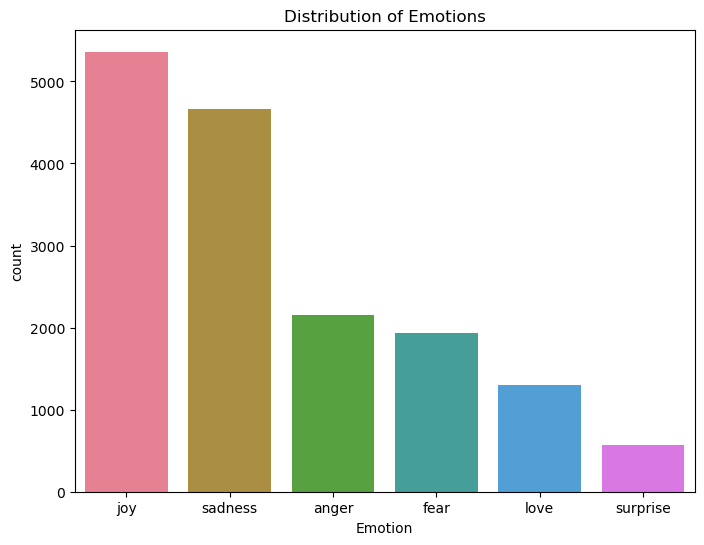

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, palette="husl")
plt.title('Distribution of Emotions')
plt.show()

In [13]:
print(df.isnull().sum())

Description    0
Emotion        0
dtype: int64


In [14]:
# convert Categories data into numerical
df['Emotion']=df['Emotion'].astype('category').cat.codes
df

,Description,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


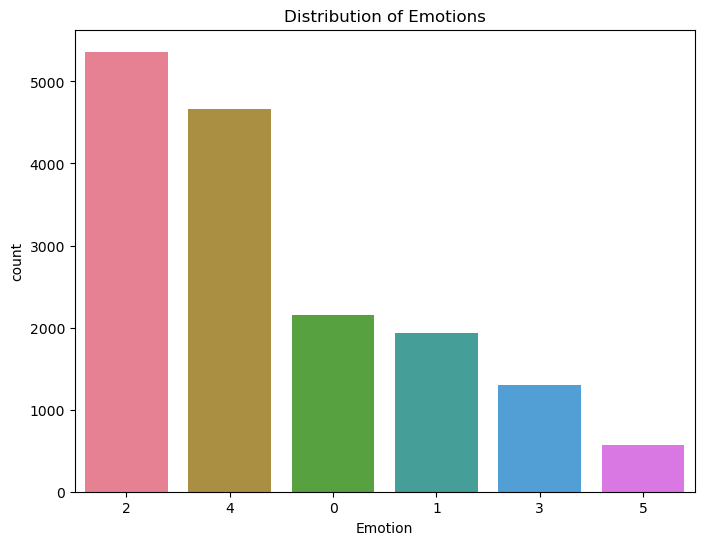

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, palette="husl")
plt.title('Distribution of Emotions')
plt.show()

In [16]:
# split data x,y
X = df['Description'].to_list()
y = df['Emotion'].to_list()

In [17]:
# split data by train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# import Distilbert tokenizatio,sequence model for sentiment analysis
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# train and test encodings
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [20]:
# split dataset into train and test
from datasets import Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': y_train
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': y_test
})


In [21]:
#train model
from sklearn.metrics import accuracy_score, classification_report
training_args = TrainingArguments(
    output_dir="/result",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
)
# tokenizer.add_special_tokens({"pad_token": "[PAD]"})

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

  0%|          | 0/4800 [00:00<?, ?it/s]

{'loss': 0.6901, 'grad_norm': 3.568355083465576, 'learning_rate': 4.4791666666666673e-05, 'epoch': 0.31}
{'loss': 0.3239, 'grad_norm': 0.1412397176027298, 'learning_rate': 3.958333333333333e-05, 'epoch': 0.62}
{'loss': 0.2899, 'grad_norm': 4.198080062866211, 'learning_rate': 3.4375e-05, 'epoch': 0.94}
{'loss': 0.2093, 'grad_norm': 0.08141589164733887, 'learning_rate': 2.916666666666667e-05, 'epoch': 1.25}
{'loss': 0.1673, 'grad_norm': 4.757608413696289, 'learning_rate': 2.3958333333333334e-05, 'epoch': 1.56}
{'loss': 0.1455, 'grad_norm': 14.729409217834473, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.88}
{'loss': 0.1293, 'grad_norm': 7.404860019683838, 'learning_rate': 1.3541666666666666e-05, 'epoch': 2.19}
{'loss': 0.1064, 'grad_norm': 0.004553761798888445, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}
{'loss': 0.0853, 'grad_norm': 12.194487571716309, 'learning_rate': 3.125e-06, 'epoch': 2.81}
{'train_runtime': 11475.1174, 'train_samples_per_second': 3.346, 'train_step

TrainOutput(global_step=4800, training_loss=0.22873068809509278, metrics={'train_runtime': 11475.1174, 'train_samples_per_second': 3.346, 'train_steps_per_second': 0.418, 'train_loss': 0.22873068809509278, 'epoch': 3.0})

In [25]:
#save train model
trainer.save_model('./tuned_data')

In [26]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('./tuned_data')

In [29]:
import torch

# Assuming you have already loaded your model and tokenizer
def generate_reply(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=256, padding='max_length', truncation=True)
    
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    num_labels = len(model.config.id2label)
    
    summary = f"Predicted class ID: {predicted_class_id}"
    return summary

# Example usage:
text = "i am excited"
response = generate_reply(text)
print(response)


Predicted class ID: 2
